In [1]:
#import library packages
import numpy as np
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [2]:
#Load the Births to Mothers 
df_population = pd.read_csv("population.csv")

In [3]:
df_population.head()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
0,Population,2022,Carlow County Council,Age 0-4,Males,Number,1800
1,Population,2022,Carlow County Council,Age 0-4,Females,Number,1736
2,Population,2022,Carlow County Council,Age 0-4,Both Sexes,Number,3536
3,Population,2022,Carlow County Council,Age 5-9,Males,Number,2063
4,Population,2022,Carlow County Council,Age 5-9,Females,Number,2026


In [4]:
# Checking the data type 
df_population.dtypes

Statistic Label                 object
Census Year                      int64
Administrative Counties 2019    object
Age                             object
Sex                             object
UNIT                            object
VALUE                            int64
dtype: object

In [5]:
# Dropping irrelevant columns
df_population = df_population.drop(["Statistic Label",'Census Year','UNIT'], axis=1)
df_population.head() 

,Administrative Counties 2019,Age,Sex,VALUE
0,Carlow County Council,Age 0-4,Males,1800
1,Carlow County Council,Age 0-4,Females,1736
2,Carlow County Council,Age 0-4,Both Sexes,3536
3,Carlow County Council,Age 5-9,Males,2063
4,Carlow County Council,Age 5-9,Females,2026


In [6]:
# Renaming the column names
df_population =df_population.rename(columns={"Administrative Counties 2019": "Counties","VALUE" : "Value"})
df_population.head(5) 

,Counties,Age,Sex,Value
0,Carlow County Council,Age 0-4,Males,1800
1,Carlow County Council,Age 0-4,Females,1736
2,Carlow County Council,Age 0-4,Both Sexes,3536
3,Carlow County Council,Age 5-9,Males,2063
4,Carlow County Council,Age 5-9,Females,2026


In [7]:
# Total number of rows and columns 
df_population.shape

(1824, 4)

In [8]:
# Rows containing duplicate data
duplicate_rows_df = df_population[df_population.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


In [9]:
# Rows containing nulls
null_mask = df_population.isnull().any(axis=1)
null_rows = df_population[null_mask]
print(null_rows)

Empty DataFrame
Columns: [Counties, Age, Sex, Value]
Index: []


The rows contain a summarized rows by sex which is called "Both Sexes", now we need to delete these rows because we can get them by groupings

In [10]:
df_population = df_population.loc[df_population["Sex"] != "Both Sexes"]

The rows contain anothers summarized rows by Age which is called "Total", now we need to delete these rows because we can get them by groupings

In [11]:
df_population = df_population.loc[df_population["Age"] != "Total"]

The rows contain anothers summarized rows by Counties which is called "Ireland", now we need to delete these rows because we can get them by groupings

In [12]:
df_population = df_population.loc[df_population["Counties"] != "Ireland"]

In [13]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1116 entries, 0 to 1762
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Counties  1116 non-null   object
 1   Age       1116 non-null   object
 2   Sex       1116 non-null   object
 3   Value     1116 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 43.6+ KB


In [14]:
df_population["Value"].isnull().count()

1116

In [15]:
df_population["Value"].max()

29767

In [16]:
df_population["Value"].min()

282

In [17]:
df_population_by_counties = df_population.groupby('Counties').sum("Value")
df_population_by_counties.reset_index().sort_values('Value')

,Counties,Value
15,Leitrim County Council,35199
17,Longford County Council,46751
0,Carlow County Council,61968
21,Monaghan County Council,65288
24,Sligo County Council,70198
23,Roscommon County Council,70259
1,Cavan County Council,81704
22,Offaly County Council,83150
9,Galway City Council,84414
14,Laois County Council,91877


<Axes: xlabel='Value'>

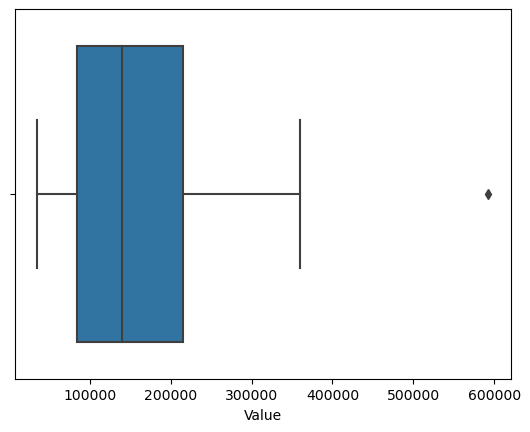

In [18]:
sns.boxplot(x=df_population_by_counties['Value']) 